# Object Detection For Streets using YOLO


In [28]:
import numpy as np
import os
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import cv2


In [29]:
!pip install ultralytics
import ultralytics
from ultralytics import YOLO
yolo_model=YOLO('yolov8n.pt')

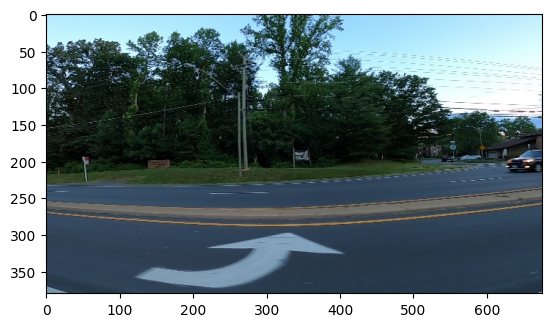

In [30]:
import random,os
from tensorflow.keras.preprocessing.image import  load_img

sample = random.choice(os.listdir('/content/drive/MyDrive/streets'))
image_path = '/content/drive/MyDrive/streets/' + sample
image = load_img(image_path)
plt.imshow(image)

In [35]:
# Create a list to store the images
num_samples=8
random_image = [load_img(os.path.join('/content/drive/MyDrive/streets', random.choice(os.listdir('/content/drive/MyDrive/streets')))) for _ in range(num_samples)]
images = []
for i in range(num_samples):
    yolo_outputs = yolo_model.predict(random_image[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names

    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        #print(f'In this image {len(box)} objects has been detected.')
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')

    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])


0: 384x640 1 car, 155.6ms
Speed: 4.8ms preprocess, 155.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Object 1 is: car
Coordinates are: [0.1064695343375206, 202.9886016845703, 77.00239562988281, 233.59451293945312]
Confidence is: 0.87
-------

0: 384x640 2 cars, 170.0ms
Speed: 2.2ms preprocess, 170.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Object 1 is: car
Coordinates are: [405.339599609375, 193.946044921875, 505.9922790527344, 232.41586303710938]
Confidence is: 0.87
-------
Object 2 is: car
Coordinates are: [619.0366821289062, 187.96817016601562, 638.30615234375, 197.91351318359375]
Confidence is: 0.25
-------

0: 384x640 1 person, 2 cars, 151.6ms
Speed: 2.3ms preprocess, 151.6ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)
Object 1 is: car
Coordinates are: [0.20978817343711853, 204.78836059570312, 68.17430114746094, 234.36265563964844]
Confidence is: 0.69
-------
Object 2 is: person
Coordinates are: [374.1670227050

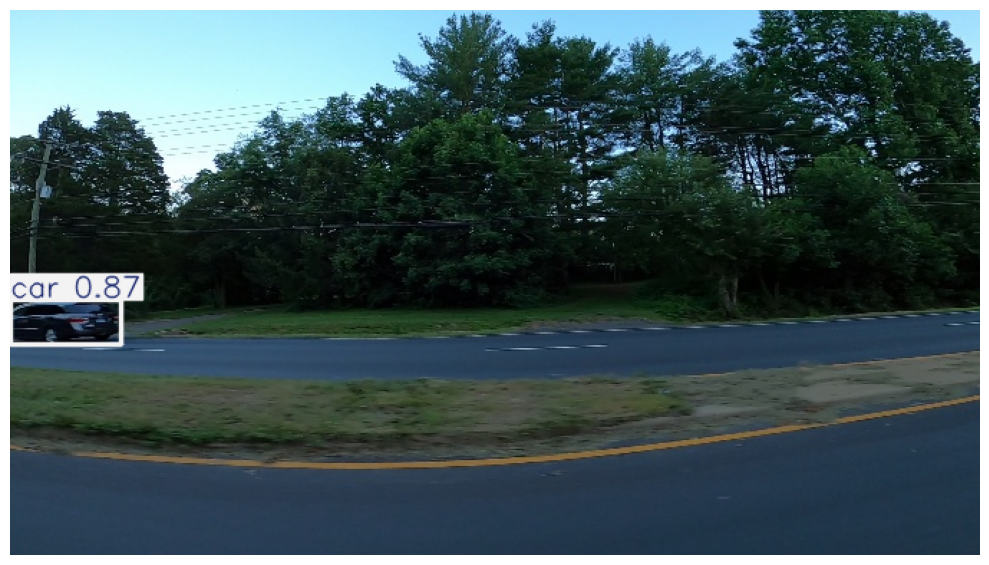

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(images[0])
plt.axis('off')
plt.tight_layout()
plt.show()

In [48]:
def ODImage(image) :
  yolo_outputs = yolo_model.predict(image)
  output = yolo_outputs[0]
  box = output.boxes
  names = output.names
  for j in range(len(box)):
    labels = names[box.cls[j].item()]
    coordinates = box.xyxy[j].tolist()
    confidence = np.round(box.conf[j].item(), 2)
    print(f'Object {j + 1} is: {labels}')
    print(f'Coordinates are: {coordinates}')
    print(f'Confidence is: {confidence}')
    print('-------')
  NewImage = output.plot()[:, :, ::-1]
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(cv2.imread(image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
  plt.title('Original Image')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(NewImage)
  plt.axis('off')
  plt.title('OD Image')
  plt.show()


image 1/1 /content/drive/MyDrive/streets/vid_4_9960.jpg: 384x640 1 car, 165.3ms
Speed: 2.5ms preprocess, 165.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Object 1 is: car
Coordinates are: [493.86102294921875, 179.60256958007812, 608.4578247070312, 218.93894958496094]
Confidence is: 0.86
-------


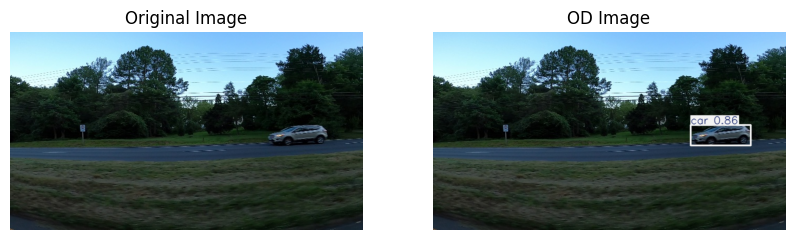

In [49]:
Path = '/content/drive/MyDrive/streets'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))